In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df= pd.read_csv("data_clean.csv", index_col=None)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.shape

(1485799, 21)

In [81]:
df['medical_supp'] = np.where((df['primary_type'] == 'BATTERY') | (df['primary_type'] == 'ASSAULT'),1,0)

<Axes: >

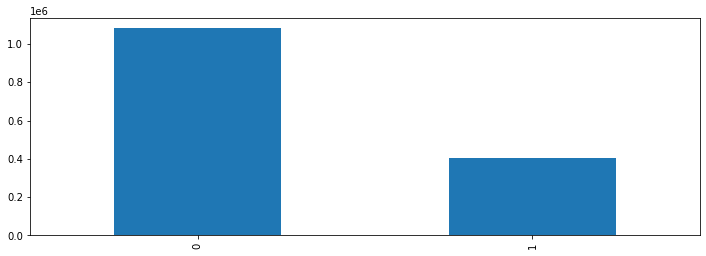

In [82]:
fig,ax = plt.subplots(figsize=(12,4))
df['medical_supp'].value_counts().plot.bar()

<Axes: xlabel='medical_supp', ylabel='count'>

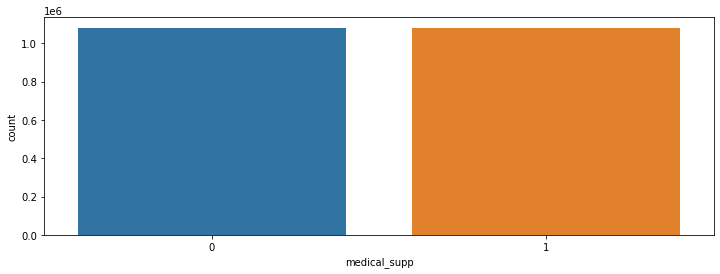

In [83]:
dfu=df.copy() #copy the dataframe

#minority class size
minority_class_len= len(dfu[dfu['medical_supp']==0])

#majority class -> this case is 1
majority_class_indices= dfu[dfu['medical_supp']==1].index

#choose randomly a indice from the majority class indices using the len of the minority class
random_majority_indices= np.random.choice(majority_class_indices, minority_class_len)

#find indices of our minority class - this case is 0
minority_class_indices = dfu[dfu['medical_supp']==0].index

#concatenate the indices
under_sample_indices= np.concatenate([minority_class_indices, random_majority_indices])

#reach only the indices from the under sample 
under_sample= dfu.loc[under_sample_indices]

fig,ax = plt.subplots(figsize=(12,4))
sns.countplot(x='medical_supp',data=under_sample)

In [84]:
dfu=under_sample.copy()
dfu=dfu.reset_index(drop=True)

In [85]:
dfu['District'].value_counts()

11.0    146437
6.0     144635
8.0     133783
4.0     128932
7.0     121133
3.0     113461
25.0    111080
12.0    105333
10.0    104242
1.0     101967
18.0    101635
5.0     100618
2.0      99434
9.0      96276
19.0     89918
15.0     88924
16.0     71885
22.0     69230
14.0     68070
24.0     66866
17.0     58759
20.0     39791
Name: District, dtype: int64

In [86]:
dfu= dfu[['date','arrest','domestic','Beat','District','ward','community_area','year','month','hour','District_Cat','day','part_of_day','day_of_week','medical_supp']]

In [87]:


# categorize age and salary columns using np.where()
dfu['District_Cat'] = np.where(dfu['District_Cat'] == 'central', 0, np.where(dfu['District_Cat'] == 'north',1,2))

dfu['part_of_day'] = np.where(dfu['part_of_day'] == 'morning', 0, np.where(dfu['part_of_day'] == 'afternoon',1,2))

dfu['day_of_week_Cat'] = np.where(dfu['day_of_week'] == 'Monday', 1, np.where(dfu['day_of_week'] == 'Tuesday',2,
                                                                            np.where(dfu['day_of_week'] == 'Wednesday',3,
                                                                                     np.where(dfu['day_of_week'] == 'Thursday',4,
                                                                                              np.where(dfu['day_of_week'] == 'Friday',5,
                                                                                                  np.where(dfu['day_of_week'] == 'Saturday',6,7))))))

In [88]:
# convert the date column to datetime type
dfu['date'] = pd.to_datetime(dfu['date'])

# define a lambda function to format each date string
format_date = lambda x: datetime.strftime(x, '%Y-%m-%d')

# apply the lambda function to the date column using apply()
dfu['formatted_date'] = dfu['date'].apply(format_date)

In [89]:
dfu= dfu[['formatted_date','arrest','domestic','Beat','District','ward','community_area','year','month','hour','District_Cat','day','part_of_day','day_of_week_Cat','medical_supp']]
dfu

,formatted_date,arrest,domestic,Beat,District,ward,community_area,year,month,hour,District_Cat,day,part_of_day,day_of_week_Cat,medical_supp
0,2020-03-17,0,0,1634,16.0,45.0,15.0,2020,3,21,1,17,2,2,0
1,2019-09-24,0,0,132,1.0,3.0,33.0,2019,9,8,0,24,0,2,0
2,2019-10-13,0,0,1221,12.0,26.0,24.0,2019,10,20,0,13,2,7,0
3,2020-03-18,0,1,1132,11.0,28.0,26.0,2020,3,2,1,18,2,3,0
4,2019-10-05,0,0,1224,12.0,27.0,28.0,2019,10,18,0,5,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162487,2017-06-01,0,1,231,2.0,20.0,40.0,2017,6,11,0,1,0,4,1
2162488,2017-09-01,0,0,123,1.0,2.0,32.0,2017,9,22,0,1,2,5,1
2162489,2022-09-19,0,0,1034,10.0,24.0,30.0,2022,9,14,0,19,1,1,1
2162490,2022-11-27,0,0,1831,18.0,42.0,8.0,2022,11,21,0,27,2,7,1


In [90]:
import pandas as pd
import numpy as np


corr = dfu.corr()
corr.style.background_gradient(cmap='coolwarm')

,arrest,domestic,Beat,District,ward,community_area,year,month,hour,District_Cat,day,part_of_day,day_of_week_Cat,medical_supp
arrest,1.000000,-0.008640,-0.018424,-0.018528,-0.007322,0.011889,-0.087716,-0.020851,0.032574,0.024747,0.000262,0.024368,0.009240,-0.005945
domestic,-0.008640,1.000000,-0.064846,-0.064854,-0.088681,0.108318,0.030537,-0.011243,-0.038159,0.088751,0.000977,0.043710,0.033452,0.404779
Beat,-0.018424,-0.064846,1.000000,0.999873,0.667516,-0.487541,0.004736,0.004324,-0.002537,0.063519,-0.002560,0.014398,0.011317,-0.050003
District,-0.018528,-0.064854,0.999873,1.000000,0.668714,-0.488228,0.004663,0.004358,-0.002445,0.063952,-0.002564,0.014376,0.011263,-0.050089
ward,-0.007322,-0.088681,0.667516,0.668714,1.000000,-0.523946,0.000722,0.005023,0.002199,-0.034518,-0.001956,-0.000935,0.007894,-0.065648
community_area,0.011889,0.108318,-0.487541,-0.488228,-0.523946,1.000000,-0.000176,-0.007388,0.000382,0.278937,0.000478,-0.007105,-0.012470,0.074488
year,-0.087716,0.030537,0.004736,0.004663,0.000722,-0.000176,1.000000,-0.085446,-0.036160,-0.003354,-0.003206,0.017533,0.000110,0.011017
month,-0.020851,-0.011243,0.004324,0.004358,0.005023,-0.007388,-0.085446,1.000000,0.001661,-0.003785,-0.001261,0.010714,0.006660,-0.002626
hour,0.032574,-0.038159,-0.002537,-0.002445,0.002199,0.000382,-0.036160,0.001661,1.000000,-0.003379,0.010417,0.094426,-0.037190,-0.003222
District_Cat,0.024747,0.088751,0.063519,0.063952,-0.034518,0.278937,-0.003354,-0.003785,-0.003379,1.000000,-0.000922,0.000176,-0.008346,0.053306


In [91]:
X_predictiontest= dfu[dfu.formatted_date >= '2023-01-01']
X_norm=dfu[dfu.formatted_date < '2023-01-01']

In [92]:
X_norm = X_norm.sort_values('formatted_date')
X_norm.dropna(inplace=True)

In [93]:
X= X_norm.drop(['medical_supp'],axis=1)
y= X_norm['medical_supp']

X.set_index('formatted_date', inplace=True)

In [94]:
# assume X is a matrix of features and y is a vector of labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

### Linear Regression

In [95]:
from sklearn.preprocessing import StandardScaler
# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# create the linear model SGDclassifier
from sklearn.linear_model import SGDClassifier
linear_clf = SGDClassifier()

# Train the classifier using fit() function
linear_clf.fit(X_train, y_train)

# Print the learned coeficients
print ("\nThe coefficients of the linear boundary are:", linear_clf.coef_)
print ("\nThe point of intersection of the line are:",linear_clf.intercept_)

# Evaluate the result
from sklearn import metrics
y_pred = linear_clf.predict(X_test)
print ("\nThe Accuracy of our classifier is:", metrics.accuracy_score(y_test, y_pred)*100)


The coefficients of the linear boundary are: [[-4.63429180e-03  8.73084172e-01  9.95340115e-03 -3.94028650e-03
  -1.90527359e-03  4.91726378e-03  2.92253762e-03  4.26296115e-03
   6.93867048e-04 -6.92343417e-04  7.29913475e-04  1.82169872e-03
  -1.29457084e-03]]

The point of intersection of the line are: [-0.47912095]

The Accuracy of our classifier is: 68.18944625031256


In [96]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74    209691
           1       0.83      0.45      0.58    206237

    accuracy                           0.68    415928
   macro avg       0.73      0.68      0.66    415928
weighted avg       0.73      0.68      0.66    415928



#### Test for the evaluation set

In [97]:
X_predictiontest = X_predictiontest.sort_values('formatted_date')
X_predictiontest.dropna(inplace=True)
X_predictiontest.set_index('formatted_date', inplace=True)
X_eval= X_predictiontest.drop(['medical_supp'],axis=1)
y_eval= X_predictiontest['medical_supp']

In [98]:
X_eval = scaler.transform(X_eval)

y_pred_eval = linear_clf.predict(X_eval)
print ("\nThe Accuracy of our classifier is:", metrics.accuracy_score(y_eval, y_pred_eval)*100)


The Accuracy of our classifier is: 70.27497221282559


In [99]:
print(metrics.classification_report(y_eval, y_pred_eval))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77     43918
           1       0.84      0.45      0.59     38854

    accuracy                           0.70     82772
   macro avg       0.75      0.69      0.68     82772
weighted avg       0.74      0.70      0.68     82772



## Decision tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 57.93%


In [101]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.76      0.65    209691
           1       0.62      0.39      0.48    206237

    accuracy                           0.58    415928
   macro avg       0.59      0.58      0.56    415928
weighted avg       0.59      0.58      0.56    415928



#### test for evaliation set

In [102]:
y_pred_eval = model.predict(X_eval)
accuracy = accuracy_score(y_eval, y_pred_eval)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 59.75%


In [103]:
print(metrics.classification_report(y_eval, y_pred_eval))

              precision    recall  f1-score   support

           0       0.59      0.78      0.67     43918
           1       0.61      0.39      0.48     38854

    accuracy                           0.60     82772
   macro avg       0.60      0.59      0.57     82772
weighted avg       0.60      0.60      0.58     82772



## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 68.19%


In [105]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74    209691
           1       0.83      0.45      0.58    206237

    accuracy                           0.68    415928
   macro avg       0.73      0.68      0.66    415928
weighted avg       0.73      0.68      0.66    415928



#### test for eval set

In [106]:
y_pred_eval = model.predict(X_eval)
accuracy = accuracy_score(y_eval, y_pred_eval)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 70.27%


In [107]:
print(metrics.classification_report(y_eval, y_pred_eval))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77     43918
           1       0.84      0.45      0.59     38854

    accuracy                           0.70     82772
   macro avg       0.75      0.69      0.68     82772
weighted avg       0.74      0.70      0.68     82772



## Random Forest 

In [108]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 66.26%


In [109]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.88      0.72    209691
           1       0.78      0.44      0.57    206237

    accuracy                           0.66    415928
   macro avg       0.70      0.66      0.65    415928
weighted avg       0.70      0.66      0.65    415928



#### test for eval set

In [110]:
y_pred_eval = model.predict(X_eval)
accuracy = accuracy_score(y_eval, y_pred_eval)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 68.16%


In [111]:
print(metrics.classification_report(y_eval, y_pred_eval))

              precision    recall  f1-score   support

           0       0.64      0.89      0.75     43918
           1       0.79      0.44      0.57     38854

    accuracy                           0.68     82772
   macro avg       0.72      0.67      0.66     82772
weighted avg       0.71      0.68      0.66     82772

